**Yoga Pose Detection:** A Multiclass Classifier using CNN Deep Learning Model with Mediapipe 

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
import cv2
import tensorflow as tf
from tensorflow.keras import layers, models

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [ ]:
from google.colab.patches import cv2_imshow

In [ ]:
print("Num GPUs Available: ", len(tf.config.list_physical_devices('GPU')))

In [ ]:
import os

In [ ]:
!pip install mediapipe

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 33.9/33.9 MB 45.2 MB/s eta 0:00:00


In [ ]:
import mediapipe as mp

In [ ]:
mpPose = mp.solutions.pose
pose = mpPose.Pose(static_image_mode=True)
mpDraw = mp.solutions.drawing_utils # For drawing keypoints
points = mpPose.PoseLandmark # Landmarks

In [ ]:
path="/content/drive/MyDrive/YogaData/train"

In [ ]:
folders=["downdog","goddess","plank","tree","warrior2"]

In [ ]:
img_size = 256

training_data = []
training_labels = []

In [ ]:
%%time
training_data=[]
training_labels=[]
hits=0
miss=0
for folder in folders:
    folder_path = os.path.join(path, folder)
    for img_file in os.listdir(folder_path):
      if hits%100==0:
        print(f"hits,{hits}")
      img_path = os.path.join(folder_path, img_file)

      img = cv2.imread(img_path)
      img = cv2.resize(img, (img_size, img_size))
      # imageWidth, imageHeight = img.shape[:2]

      imgRGB = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

      blackie = np.zeros(img.shape) # Blank image

      results = pose.process(imgRGB)
      if results.pose_landmarks:

        # mpDraw.draw_landmarks(img, results.pose_landmarks, mpPose.POSE_CONNECTIONS) #draw landmarks on image

        mpDraw.draw_landmarks(blackie, results.pose_landmarks, mpPose.POSE_CONNECTIONS) # draw landmarks on blackie

        # landmarks = results.pose_landmarks.landmark
        hits+=1
        black_image=cv2.resize(blackie, (img_size, img_size))
        black_image = cv2.cvtColor(black_image.astype('float32'), cv2.COLOR_BGR2GRAY)
        black_image=black_image/255.0
        training_data.append(black_image)
        training_labels.append(folders.index(folder))
      else:
        miss+=1
        # images.append(img)

hits,0
hits,100
hits,200
hits,300
hits,400
hits,500
hits,600
hits,700
hits,800
hits,900
hits,1000
hits,1100
hits,1200
hits,1300
hits,1400
hits,1500
hits,1600
hits,1700
CPU times: user 1min 52s, sys: 2.5 s, total: 1min 54s
Wall time: 2min 37s


In [ ]:
%%time
print(hits,miss)

1718 70
CPU times: user 534 µs, sys: 17 µs, total: 551 µs
Wall time: 430 µs


In [ ]:
%%time
from tensorflow.keras.preprocessing.image import ImageDataGenerator
count=0
datagen = ImageDataGenerator(
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    vertical_flip=False,
    fill_mode='nearest',
    channel_shift_range=0.2)
 
augmented_data = []
augmented_labels = []
 
for folder in folders:
    print(folder,count)    
    folder_path = os.path.join(path, folder)
    for img_file in os.listdir(folder_path):
        img_path = os.path.join(folder_path, img_file)
        img = cv2.imread(img_path)
        img = cv2.resize(img, (img_size, img_size))
        img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
        # img = img / 255.0

        # augmented_data.append(img)
        # augmented_labels.append(folders.index(folder)) 
        img = img.reshape((1,) + img.shape)
        for batch in datagen.flow(img, batch_size=1):
            augmented_img = batch[0]
            blackie = np.zeros(augmented_img.shape) # Blank image

            results = pose.process(augmented_img.astype("uint8"))
            if results.pose_landmarks:
              # mpDraw.draw_landmarks(img, results.pose_landmarks, mpPose.POSE_CONNECTIONS) #draw landmarks on image

              mpDraw.draw_landmarks(blackie, results.pose_landmarks, mpPose.POSE_CONNECTIONS) # draw landmarks on blackie

              # landmarks = results.pose_landmarks.landmark
              black_image=cv2.resize(blackie, (img_size, img_size))
              black_image = cv2.cvtColor(black_image.astype('float32'), cv2.COLOR_BGR2GRAY)
              black_image=black_image/255.0
              training_data.append(black_image)
              training_labels.append(folders.index(folder))
            break



floder
1 0
floder
floder
floder
floder
CPU times: user 2min 21s, sys: 2.5 s, total: 2min 23s
Wall time: 2min 37s


In [ ]:
training_data = np.array(training_data)
training_labels = np.array(training_labels)
 
print("Training data shape:", training_data.shape)
print("Training labels shape:", training_labels.shape)

Training data shape: (3377, 256, 256)
Training labels shape: (3377,)


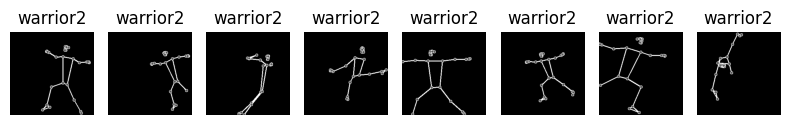

In [ ]:
def show_images(images, labels):
    fig, axes = plt.subplots(1, 8, figsize=(8, 8))
    axes = axes.ravel()
    for i in range(len(axes)):
        axes[i].imshow(images[i], cmap='gray')
        axes[i].set_title(folders[labels[i]])
        axes[i].axis('off')
    plt.tight_layout()
    plt.show()

sample_images = training_data[-10:]
sample_labels = training_labels[-10:]

show_images(sample_images, sample_labels)

In [ ]:
%%time

hits=0
miss=0
test_path = r"/content/drive/MyDrive/YogaData/test"
test_data = []
test_labels = []
count=0
for folder in folders:
    folder_path = os.path.join(test_path, folder)
    for img_file in os.listdir(folder_path):
      img_path = os.path.join(folder_path, img_file)

      img = cv2.imread(img_path)
      # imageWidth, imageHeight = img.shape[:2]
      img=cv2.resize(img, (img_size, img_size))
      imgRGB = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
      
      blackie = np.zeros(img.shape) # Blank image

      results = pose.process(imgRGB)
      if results.pose_landmarks:

        # mpDraw.draw_landmarks(img, results.pose_landmarks, mpPose.POSE_CONNECTIONS) #draw landmarks on image

        mpDraw.draw_landmarks(blackie, results.pose_landmarks, mpPose.POSE_CONNECTIONS) # draw landmarks on blackie

        # landmarks = results.pose_landmarks.landmark
        hits+=1
        black_image=cv2.resize(blackie, (img_size, img_size))
        black_image = cv2.cvtColor(black_image.astype('float32'), cv2.COLOR_BGR2GRAY)
        black_image=black_image/255.0
        test_data.append(black_image)
        test_labels.append(folders.index(folder))
        count += 1
        if count % 100 == 0:
          print(count)
      else:
        miss+=1
        # images.append(img)


print(hits,miss)
test_data = np.array(test_data)
test_labels = np.array(test_labels)

100
200
300
385 8
CPU times: user 26.7 s, sys: 301 ms, total: 27 s
Wall time: 28.1 s


# TF

In [ ]:
checkpoint_filepath="/tmp/checkpoint"
model_checkpoint_callback=tf.keras.callbacks.ModelCheckpoint(
    filepath=checkpoint_filepath,
    save_weights_only=True,
    monitor="val_loss",
    mode='max',
    save_best_only=True
)

In [ ]:

input_shape = (img_size, img_size, 1)
 
model = models.Sequential([
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=input_shape),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(128, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(128, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(128, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    layers.Dense(len(folders), activation='softmax')
])

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

history = model.fit(training_data, training_labels, epochs=20, validation_split=0.2,callbacks=[model_checkpoint_callback])

Epoch 1/20
85/85 [==============================] - 8s 73ms/step - loss: 0.8525 - accuracy: 0.6623 - val_loss: 1.0965 - val_accuracy: 0.6479
Epoch 2/20
85/85 [==============================] - 5s 60ms/step - loss: 0.4174 - accuracy: 0.8575 - val_loss: 1.1893 - val_accuracy: 0.5858
Epoch 3/20
85/85 [==============================] - 5s 60ms/step - loss: 0.2581 - accuracy: 0.9034 - val_loss: 1.8671 - val_accuracy: 0.5592
Epoch 4/20
85/85 [==============================] - 5s 62ms/step - loss: 0.1571 - accuracy: 0.9452 - val_loss: 1.0425 - val_accuracy: 0.7175
Epoch 5/20
85/85 [==============================] - 5s 59ms/step - loss: 0.0826 - accuracy: 0.9700 - val_loss: 1.7804 - val_accuracy: 0.6420
Epoch 6/20
85/85 [==============================] - 5s 64ms/step - loss: 0.0457 - accuracy: 0.9841 - val_loss: 2.6482 - val_accuracy: 0.6050
Epoch 7/20
85/85 [==============================] - 5s 61ms/step - loss: 0.0463 - accuracy: 0.9822 - val_loss: 1.9171 - val_accuracy: 0.6627
Epoch 8/20
85

In [ ]:
history.history

{'loss': [0.8492923974990845,
  0.4255976378917694,
  0.2822619378566742,
  0.1547458916902542,
  0.08835351467132568,
  0.05245037376880646,
  0.035821784287691116,
  0.046020179986953735,
  0.040677882730960846,
  0.008679515682160854],
 'accuracy': [0.6745649576187134,
  0.8552387952804565,
  0.8996667861938477,
  0.9403924345970154,
  0.9703813195228577,
  0.9833394885063171,
  0.9881525635719299,
  0.9874120950698853,
  0.9866716265678406,
  0.997408390045166],
 'val_loss': [1.1100019216537476,
  1.2381103038787842,
  1.0636322498321533,
  1.3596174716949463,
  1.659891128540039,
  2.119201183319092,
  3.090578317642212,
  1.9030358791351318,
  3.4254748821258545,
  3.159965991973877],
 'val_accuracy': [0.6005917191505432,
  0.5473372936248779,
  0.6582840085029602,
  0.6612426042556763,
  0.7011834383010864,
  0.6775147914886475,
  0.5976331233978271,
  0.6568047404289246,
  0.6139053106307983,
  0.6775147914886475]}

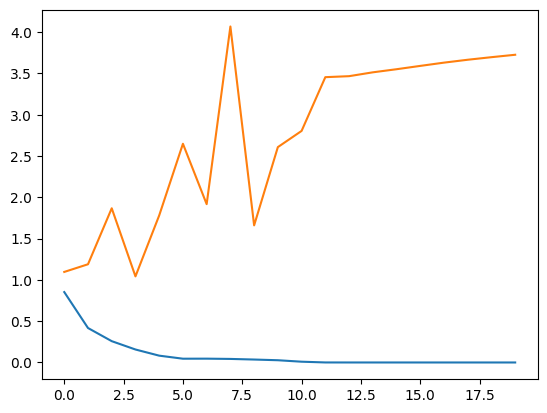

In [ ]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.show()

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report, confusion_matrix

13/13 [==============================] - 0s 20ms/step

Classification Report:
              precision    recall  f1-score   support

     downdog       0.98      0.99      0.98        80
     goddess       0.85      0.99      0.91        73
       plank       0.95      0.86      0.90        69
        tree       1.00      0.98      0.99        64
    warrior2       0.98      0.93      0.95        99

    accuracy                           0.95       385
   macro avg       0.95      0.95      0.95       385
weighted avg       0.95      0.95      0.95       385



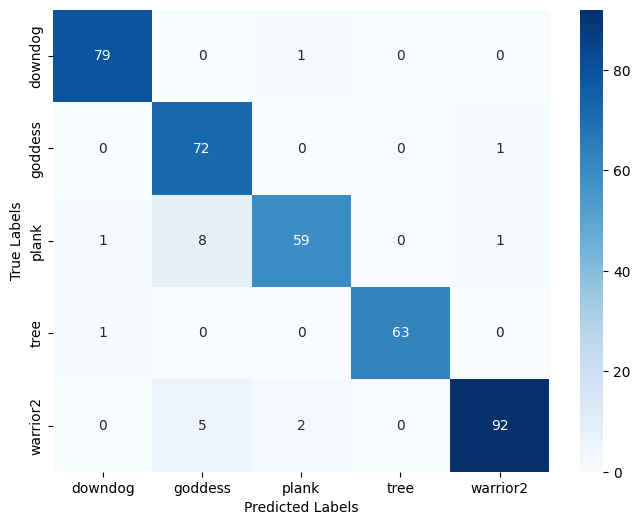

In [ ]:
predictions = model.predict(test_data)
 
predicted_labels = np.argmax(predictions, axis=1)

print("\nClassification Report:")
print(classification_report(test_labels, predicted_labels, target_names=folders))

cm = confusion_matrix(test_labels, predicted_labels)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, cmap='Blues', xticklabels=folders, yticklabels=folders)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()

106/106 [==============================] - 2s 16ms/step

Classification Report:
              precision    recall  f1-score   support

     downdog       0.95      1.00      0.97       623
     goddess       0.84      1.00      0.91       808
       plank       0.89      1.00      0.94       261
        tree       0.98      0.94      0.96       916
    warrior2       1.00      0.76      0.87       769

    accuracy                           0.93      3377
   macro avg       0.93      0.94      0.93      3377
weighted avg       0.94      0.93      0.93      3377



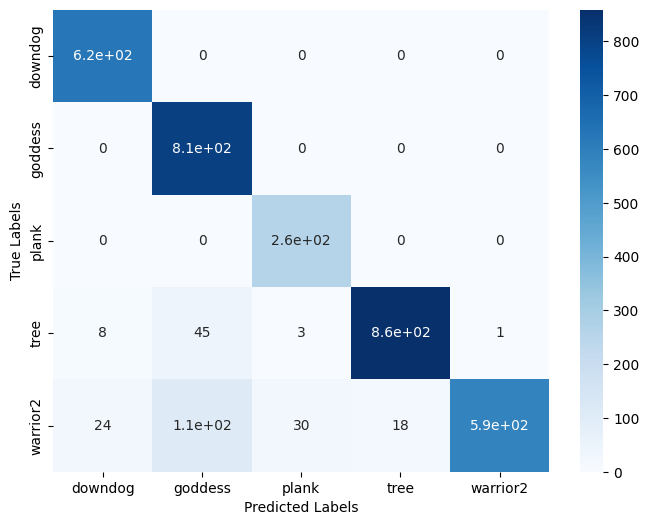

In [ ]:
predictions = model.predict(training_data)
 
predicted_labels = np.argmax(predictions, axis=1)

print("\nClassification Report:")
print(classification_report(training_labels, predicted_labels, target_names=folders))

cm = confusion_matrix(training_labels, predicted_labels)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, cmap='Blues', xticklabels=folders, yticklabels=folders)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()

In [ ]:
%%time
hits=0
miss=0
new_test_path = r"/content/drive/MyDrive/YogaData/new_test"
new_test_data = []
new_test_labels = []
for folder in folders:
    folder_path = os.path.join(new_test_path, folder)
    for img_file in os.listdir(folder_path):
      img_path = os.path.join(folder_path, img_file)

      img = cv2.imread(img_path)
      # imageWidth, imageHeight = img.shape[:2]

      imgRGB = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

      blackie = np.zeros(img.shape) # Blank image

      results = pose.process(imgRGB)
      if results.pose_landmarks:

        # mpDraw.draw_landmarks(img, results.pose_landmarks, mpPose.POSE_CONNECTIONS) #draw landmarks on image

        mpDraw.draw_landmarks(blackie, results.pose_landmarks, mpPose.POSE_CONNECTIONS) # draw landmarks on blackie

        # landmarks = results.pose_landmarks.landmark
        hits+=1
        black_image=cv2.resize(blackie, (img_size, img_size))
        black_image = cv2.cvtColor(black_image.astype('float32'), cv2.COLOR_BGR2GRAY)
        black_image=black_image/255.0
        new_test_data.append(black_image)
        new_test_labels.append(folders.index(folder))
      else:
        miss+=1

        # images.append(img)


print(hits,miss)
new_test_data = np.array(new_test_data)
new_test_labels = np.array(new_test_labels)

17 0
CPU times: user 1.36 s, sys: 39.3 ms, total: 1.4 s
Wall time: 13.9 s


1/1 [==============================] - 0s 31ms/step

Classification Report:
              precision    recall  f1-score   support

     downdog       1.00      1.00      1.00         4
     goddess       1.00      1.00      1.00         2
       plank       1.00      1.00      1.00         5
        tree       1.00      1.00      1.00         2
    warrior2       1.00      1.00      1.00         4

    accuracy                           1.00        17
   macro avg       1.00      1.00      1.00        17
weighted avg       1.00      1.00      1.00        17



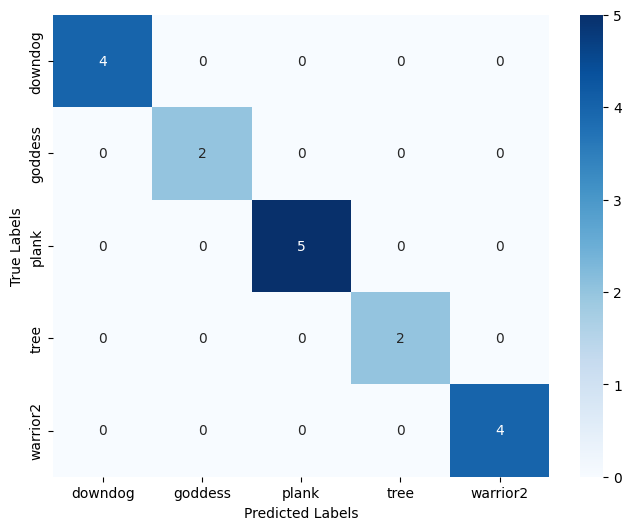

In [ ]:
predictions = model.predict(new_test_data)
 
predicted_labels = np.argmax(predictions, axis=1)

print("\nClassification Report:")
print(classification_report(new_test_labels, predicted_labels, target_names=folders))

cm = confusion_matrix(new_test_labels, predicted_labels)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, cmap='Blues', xticklabels=folders, yticklabels=folders)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()

tree
3
goddess
1
goddess
1
1/1 [==============================] - 0s 21ms/step
[3 1 1]


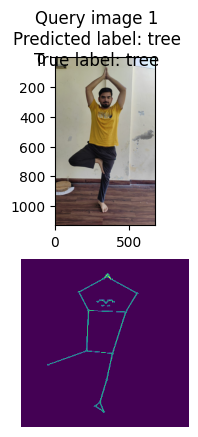

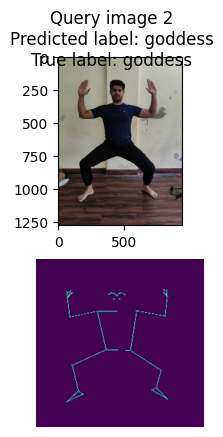

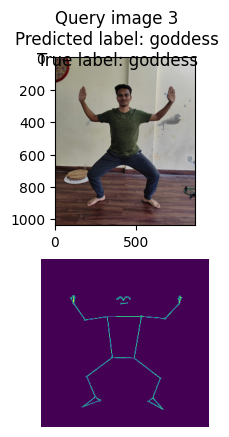

In [ ]:
import random
query_images = []
original_image=[]
query_labels = []
for i in range(3):
    folder = random.choice(folders)
    print(folder)
    folder_path = os.path.join(new_test_path, folder)
    img_file = random.choice(os.listdir(folder_path))
    img_path = os.path.join(folder_path, img_file)
    img = cv2.imread(img_path)
    # img = cv2.resize(img, (img_size, img_size))
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    blackie = np.zeros(img.shape) # Blank image
    results = pose.process(img)
    mpDraw.draw_landmarks(blackie, results.pose_landmarks, mpPose.POSE_CONNECTIONS) # draw landmarks on blackie

    # landmarks = results.pose_landmarks.landmark
    hits+=1
    black_image=cv2.resize(blackie, (img_size, img_size))
    black_image = cv2.cvtColor(black_image.astype('float32'), cv2.COLOR_BGR2GRAY)
    black_image=black_image/255.0

    query_images.append(black_image)
    original_image.append(img)
    query_labels.append(folders.index(folder))
    print(folders.index(folder))
    
query_images = np.array(query_images)
query_labels = np.array(query_labels)
 
query_images = query_images.reshape(-1, img_size, img_size, 1)
predicted_labels = np.argmax(model.predict(query_images), axis=1)
import matplotlib.pyplot as plt

for i in range(3):
    fig,axes=plt.subplots(2)
    predicted_label = folders[predicted_labels[i]]
    true_label = folders[query_labels[i]]
    query_image = query_images[i].reshape(img_size, img_size)
    axes[0].imshow(original_image[i], cmap='gray')
    axes[1].imshow(query_image)
    fig.suptitle("Query image %d\nPredicted label: %s\nTrue label: %s" % (i+1, predicted_label, true_label))
    plt.axis('off')
    plt.show()